<a href="https://colab.research.google.com/github/ManishShinde15/Data_Analysis/blob/DS-%26-ML/Travel_Aggregator_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the data

In [2]:
bookings = pd.read_csv('Bookings.csv')
sessions = pd.read_csv('Sessions.csv')


# Convert booking_time to datetime

In [61]:
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])

1) Find the number of distinct bookings, sessions, and searches

In [5]:
distinct_bookings = bookings['booking_id'].nunique()
distinct_sessions = sessions['session_id'].nunique()
distinct_searches = sessions['search_id'].nunique()

print(f"Number of distinct bookings: {distinct_bookings}")
print(f"Number of distinct sessions: {distinct_sessions}")
print(f"Number of distinct searches: {distinct_searches}")


Number of distinct bookings: 339
Number of distinct sessions: 331
Number of distinct searches: 1360


2) How many sessions have more than one booking?

In [8]:
sessions_with_multiple_bookings = sessions[sessions.duplicated(['session_id'], keep=False)]['session_id'].nunique()

print(f"Number of sessions with more than one booking: {sessions_with_multiple_bookings}")

Number of sessions with more than one booking: 237


3)Which days of the week have the highest number of bookings?
Also, draw a pie chart to show the distribution for all days of the week?

In [10]:
bookings['day_of_week'] = bookings['booking_time'].dt.day_name()

bookings_by_day = bookings['day_of_week'].value_counts()

print("Bookings per day of the week:")
print(bookings_by_day)


Bookings per day of the week:
day_of_week
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64


# Plot a pie chart

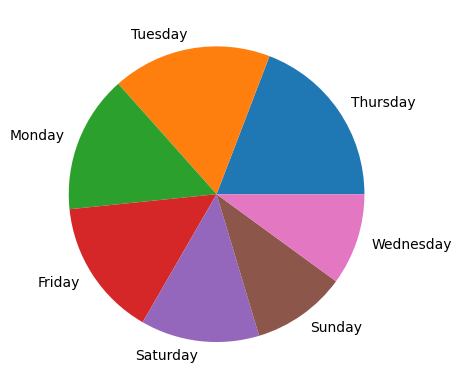

In [11]:
plt.pie(bookings_by_day, labels = bookings_by_day.index)
plt.show()


4) For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.

In [19]:
service_analysis = bookings.groupby('service_name').agg(
    total_bookings=('booking_id', 'count'),
    total_gbv=('INR_Amount', 'sum'))

print("Total number of bookings and Gross Booking Value (INR) for each service name:")
print(service_analysis)


Total number of bookings and Gross Booking Value (INR) for each service name:
              total_bookings   total_gbv
service_name                            
GOIBIBO                  186  5897637.97
MMT                       48   665669.08
YATRA                    105  3378702.13


5) For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

In [23]:
bookings['route'] = bookings['from_city'] + ' to ' + bookings['to_city']
multiple_bookings = bookings[bookings.duplicated(['customer_id'], keep=False)]
most_booked_route = multiple_bookings['route'].value_counts().idxmax()

print(f"The most booked route for customers with more than one booking is from {most_booked_route} ")

The most booked route for customers with more than one booking is from Gurgaon to Roissy-en-France 


6) Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?

In [26]:
advance_bookings = bookings[bookings['days_to_departure'] > 5]

top_departure_cities = advance_bookings['from_city'].value_counts().nlargest(3)

print("Top 3 departure cities for advance bookings:")
print(top_departure_cities)


Top 3 departure cities for advance bookings:
from_city
Gurgaon    89
Mumbai     21
Delhi      19
Name: count, dtype: int64


7) Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings data set, have the maximum correlation?

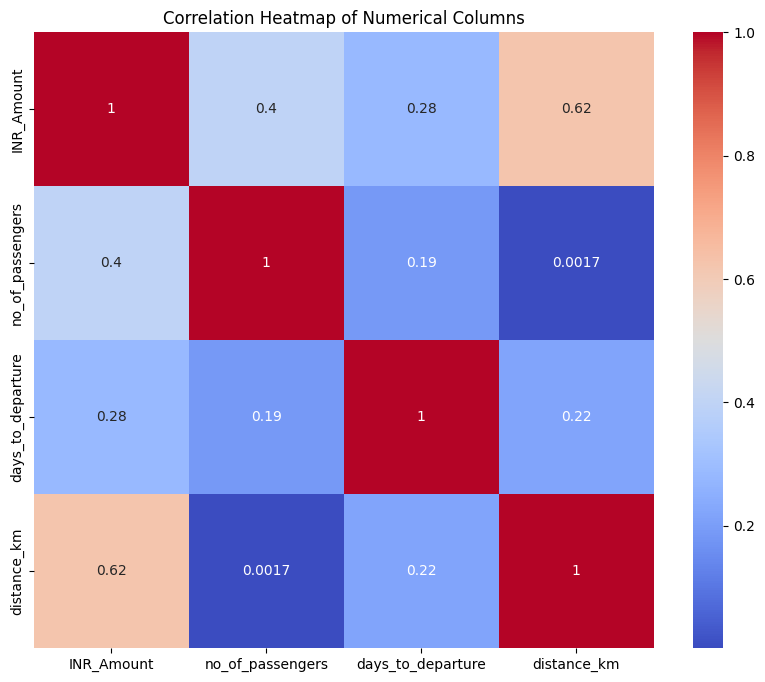



 The pair of numerical columns with the highest correlation is: ('INR_Amount', 'distance_km')


In [38]:
numerical_cols = bookings.select_dtypes(include=['number']).columns

# Compute the correlation matrix
correlation = bookings[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

max_corr = correlation.unstack().sort_values(ascending=False).drop_duplicates().index[1]

print(f"\n\n The pair of numerical columns with the highest correlation is: {max_corr}")


8) For each service, which is the most used device type for making bookings on The platform?

In [48]:
device_usage_per_service = bookings.groupby(['service_name', 'device_type_used']).size().reset_index(name='count')
most_used_device = device_usage_per_service.loc[device_usage_per_service.groupby('service_name')['count'].idxmax()]


print("Most used device type for each service:")
print(most_used_device)

Most used device type for each service:
  service_name device_type_used  count
2      GOIBIBO              IOS     70
5          MMT          Desktop     30
9        YATRA          Desktop     51


9) Plot the trends at a quarterly frequency for the number of bookings by each of the device types

<ipython-input-45-1d1f38fbcbb7>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings['quarter'] = bookings['booking_time'].dt.to_period('Q')


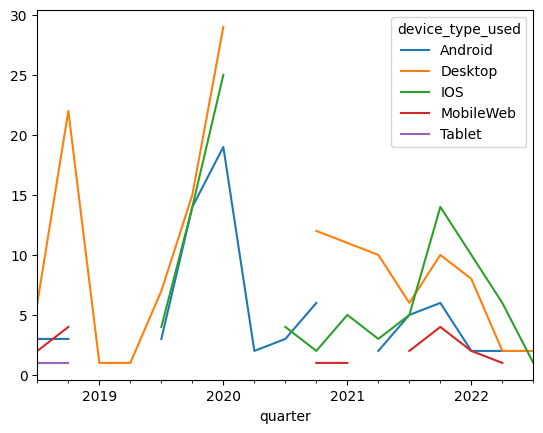

In [45]:
bookings['quarter'] = bookings['booking_time'].dt.to_period('Q')
quarterly_trends = bookings.groupby(['quarter', 'device_type_used'])['booking_id'].count().unstack()
quarterly_trends.plot()
plt.show()


10) Consider the following example:
12 customers performed a total of 100 searches but only a few of them per-formed  10 bookings in total.

Searches = 100 bookings = 10 customers = 12

The Overall booking to search ratio, Ober,is 10/100 = 0.1 Using the above infor-mation/context, answer the following:

•What is the average  oBSR for each month of the year?

•What is the average oBSR for each day of the week?

• Plot a time series of oBSR on all the given dates.


In [72]:
# Merge bookings and sessions data on booking_id
merged_df = pd.merge(sessions, bookings, on='booking_id', how='left')

# Convert date columns to datetime
merged_df['search_time'] = pd.to_datetime(merged_df['search_time'], format='ISO8601')
merged_df['booking_time'] = pd.to_datetime(merged_df['booking_time'])

# Extract dates and other relevant time information
merged_df['search_date'] = merged_df['search_time'].dt.date
merged_df['booking_date'] = merged_df['booking_time'].dt.date
merged_df['year_month'] = merged_df['search_time'].dt.to_period('M')
merged_df['day_of_week'] = merged_df['search_time'].dt.day_name()

# Calculate total searches and bookings per day, month, and day of the week
daily_searches = merged_df.groupby('search_date')['search_id'].count()
daily_bookings = merged_df.groupby('booking_date')['booking_id'].count()

monthly_searches = merged_df.groupby('year_month')['search_id'].count()
monthly_bookings = merged_df.groupby('year_month')['booking_id'].count()

weekly_searches = merged_df.groupby('day_of_week')['search_id'].count()
weekly_bookings = merged_df.groupby('day_of_week')['booking_id'].count()

# Calculate oBSR
daily_obsr = (daily_bookings / daily_searches).fillna(0)
monthly_obsr = (monthly_bookings / monthly_searches).fillna(0)
weekly_obsr = (weekly_bookings / weekly_searches).fillna(0)

# Display the average oBSR for each month and each day of the week
print("Average oBSR for each month:")
print(monthly_obsr)

print("Average oBSR for each day of the week:")
print(weekly_obsr)

Average oBSR for each month:
year_month
2018-09    0.363636
2018-10    0.101942
2018-11    0.212766
2018-12    0.228571
2019-01    0.400000
2019-06    1.000000
2019-07    0.208333
2019-08    0.285714
2019-09    0.280000
2019-10    0.214286
2019-11    0.258065
2019-12    0.221311
2020-01    0.200000
2020-02    0.298507
2020-03    0.319149
2020-05    0.062500
2020-06    0.333333
2020-07    0.095238
2020-08    0.750000
2020-09    0.333333
2020-10    0.615385
2020-11    0.375000
2020-12    0.666667
2021-01    0.600000
2021-02    0.285714
2021-03    0.277778
2021-04    0.250000
2021-05    0.500000
2021-06    0.428571
2021-07    0.105263
2021-08    0.210526
2021-09    0.541667
2021-10    0.285714
2021-11    0.154930
2021-12    0.305556
2022-01    0.423077
2022-02    0.275862
2022-03    0.175000
2022-04    0.375000
2022-05    0.266667
2022-06    0.285714
2022-07    0.250000
Freq: M, dtype: float64
Average oBSR for each day of the week:
day_of_week
Friday       0.280788
Monday       0.212598
S

<ipython-input-72-37c0ac6817e1>:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df['year_month'] = merged_df['search_time'].dt.to_period('M')


#Plot a time series of oBSR on all the given dates.


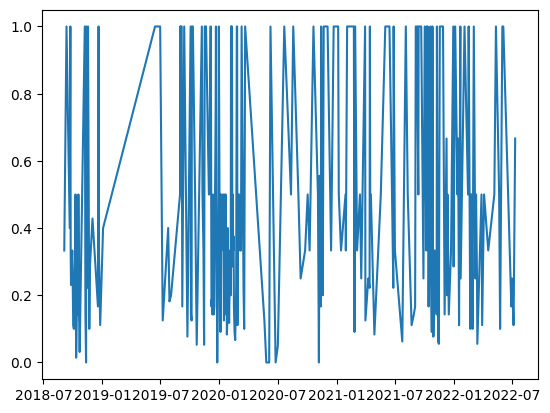

In [73]:
daily_obsr.plot()
plt.show()
